In [1]:
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format(r'C:\\Users\\BRAJ\\Downloads\\trmodel', binary=True)

In [2]:
word_vectors.most_similar(positive=["geliyor","gitmek"],negative=["gelmek"])

[('gidiyor', 0.592621922492981),
 ('gidiyorum', 0.5690363645553589),
 ('gidelim', 0.5637924671173096),
 ('geldim', 0.5413458347320557),
 ('bakıyor', 0.5373592972755432),
 ('gittim', 0.5343414545059204),
 ('gideceğim', 0.5251941680908203),
 ('geldik', 0.5050601363182068),
 ('geliyoruz', 0.5047824382781982),
 ('gider', 0.504159688949585)]

In [3]:
len(word_vectors['gitmek'])

400

In [4]:
import pandas as pd
df = pd.read_csv(r"E:/ML/turkish_data.csv")

In [5]:
df.head(2)

,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...


In [6]:
X = df['text']
y= df['category']

In [26]:
df['category'].unique()

array(['siyaset ', 'dunya ', 'ekonomi ', 'kultur ', 'saglik ', 'spor ',
       'teknoloji '], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
y_test

array([6, 5, 0, ..., 0, 3, 1])

In [9]:
vocab_size = 1000
oov_token = "<OOV>"
max_length = 400
padding_type = "post"
trunction_type='post'

In [39]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.utils import to_categorical

In [11]:
import numpy as np

In [40]:
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)

In [41]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [13]:
len(X_train.iloc[0])

3100

In [14]:
#word_index

In [15]:
#tokenizer.texts_to_sequences(X_train.iloc[2:3])

In [16]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunction_type)

X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunction_type)

In [17]:
embeddings_index = word_vectors.wv

C:\Users\BRAJ\.conda\envs\env_dl\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [18]:
embedding_matrix = np.zeros((len(word_index) + 1, max_length))
for word, i in word_index.items():
    #embedding_vector = embeddings_index.get(word)
    try:
        embedding_vector = embeddings_index[word]
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
            print("hello")
    except Exception as e:
        print(e)

"word '<OOV>' not in vocabulary"
hello
hello
hello
hello
hello
"word '\x92' not in vocabulary"
hello
hello
hello
hello
hello
hello
"word '\x94' not in vocabulary"
"word '\x93' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
"word '2' not in vocabulary"
"word '1' not in vocabulary"
hello
hello
hello
"word '3' not in vocabulary"
hello
hello
hello
hello
hello
"word '5' not in vocabulary"
hello
"word 'a' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word '4' not in vocabulary"
hello
hello
hello
hello
"word 'e' not in vocabulary"
hello
hello
hello
hello
hello
"word '10' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'o' not in vocabulary"
hello
hello
hello
"word '6' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word '2012' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word '8' not 

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word '81' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
"word '2020' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'cumhurbaşkanlığı' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word '1453' not in vocabulary"
"word 'pcos' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
he

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word '89' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word '185' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hel

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word '109' not in vocabulary"
"word '106' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word '116' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'kullanılabileceğini' not in vocabulary"
hello
"word '217' not in vocabulary"
hello
hello
hello
h

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word '1986' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'gerçekleştirdiğimiz' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
"word 'bilgisayarlardan' not in vocabulary"
hello
hello
hello
hello
hello
"word '230' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello


hello
hello
hello
hello
hello
hello
"word 'oturmanın' not in vocabulary"
"word 'araştırıyoruz' not in vocabulary"
hello
hello
hello
hello
hello
"word 'kimliğimle' not in vocabulary"
hello
"word 'görüşeceğim' not in vocabulary"
hello
hello
hello
hello
hello
"word 'kaybediliyor' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'müşterilerimize' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'oyuncularımızın' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word '1913' not in vocabulary"
"word '1938' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'kantin

hello
"word 'laycock' not in vocabulary"
hello
hello
hello
hello
hello
"word '950' not in vocabulary"
hello
hello
hello
hello
hello
"word 'ikby' not in vocabulary"
hello
hello
hello
hello
hello
hello
"word '763' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'sorgulamadı' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'incelendiğini' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
"word 'repusi' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word '113' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 's1200' not in vocabulary"
hello
"word '174' not in vocabulary"
hello
"word 'ö' not in vocabulary"
hello
hello
hello
"word 'tffhgd' not in vocabulary"
hello
hello
"word 'sevi

hello
hello
hello
hello
hello
"word 'işitmesi' not in vocabulary"
hello
"word '913' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
"word 'gerçekleşmesinde' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'geliştirilmesinin' not in vocabulary"
hello
hello
hello
hello
"word 'kırbıyık' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
"word 'turkven' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'walsh' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
"word 'carcanazi' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'büyülü

hello
hello
hello
hello
hello
hello
hello
"word 'zorlanıyoruz' not in vocabulary"
hello
hello
hello
"word 'tüketirseniz' not in vocabulary"
"word 'tüketmeyin' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'istemiyorsanız' not in vocabulary"
hello
hello
hello
hello
hello
hello
"word '239' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'satıyoruz' not in vocabulary"
hello
"word '3000' not in vocabulary"
hello
hello
hello
hello
"word '896' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
"word 'yaygınlaştırılması' not in vocabulary"
hello
hello
hello
"word 'mandiant' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'xvi' not in vocabulary"
hello
hello
hello
"word 'kurguluyor' not in vocabulary"
hello
hello
hello
hello
hello


hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'sürdürülebilirlik' not in vocabulary"
hello
"word 'mp3' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'önlenecek' not in vocabulary"
hello
hello
hello
"word 'birliğimiz' not in vocabulary"
hello
hello
hello
hello
hello
"word 'öznal' not in vocabulary"
hello
hello
hello
hello
hello
hello
"word 'patalya' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'şanssızlığımızı' not in vocabulary"
hello
hello
"word 'rasulayn' not in vocabulary"
hello
hello
hello
hello
"word 'tutacağız' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'balgamı' not in vocabulary"
hello
hello
hello
hello
hello
"word 'yapmayin' not in vocabulary"
hello
hello
hello
hello
"word 'vatandaşla' not in vocabulary"
hello
"word 'sayınızı' not in vocabulary"
hello
hello
hello
hello
hell

hello
hello
hello
hello
hello
hello
hello
"word 'wade' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
"word 'uchek' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'açiklama' not in vocabulary"
hello
"word 'desteklemeyecek' not in vocabulary"
hello
hello
"word 'paylaşabiliyorsunuz' not in vocabulary"
"word 'edebiliyorsunuz' not in vocabulary"
"word 'takıldığınız' not in vocabulary"
"word 'arkadaşınızla' not in vocabulary"
"word 'shadowfall' not in vocabulary"
hello
"word 'geliştirildiğini' not in vocabulary"
"word 'oynayabileceksiniz' not in vocabulary"
"word 'benimsenmeyen' not in vocabulary"
hello
hello
hello
hello
hello
hello
"word 'sıkmaktansa' not in vocabulary"
hello
hello
"word 'epilasyonda' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'filmlerimi' not in vocabulary"
hello
hello
hello
hello
hello
"word 'kolaylaştırılması' not in vocabulary"
hello
"word 'hedeflerimizin' not in v

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'mamulün' not in vocabulary"
hello
"word 'mamulat' not in vocabulary"
hello
hello
"word 'sigarilloların' not in vocabulary"
"word 'ambalajlarının' not in vocabulary"
hello
"word 'folyosu' not in vocabulary"
hello
"word 'mamulünün' not in vocabulary"
hello
hello
hello
"word 'hazırlayacakları' not in vocabulary"
hello
"word 'bulundurulamayacak' not in vocabulary"
"word 'ambalajının' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'sinemaseverleri' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
"word 'kapaniyor' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
"word 'yazılsın' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
"word 'başarmadık' not in vocabulary"
hello
hello
hello
"word 'rakibimizden' not in vocabulary"
"word 'yegitek' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
"w

hello
hello
hello
hello
hello
hello
"word 'posalar' not in vocabulary"
hello
hello
hello
"word 'ıslatılırsa' not in vocabulary"
"word 'tanenlerin' not in vocabulary"
"word 'vitaminlerinden' not in vocabulary"
"word 'baklagillerle' not in vocabulary"
hello
"word 'flavonoit' not in vocabulary"
hello
hello
hello
hello
"word 'kayısıyı' not in vocabulary"
"word 'aşureyi' not in vocabulary"
hello
hello
"word 'targoviste' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'kabinlerinin' not in vocabulary"
hello
hello
hello
hello
hello
"word 'kullanmazsınız' not in vocabulary"
"word 'kaybedebilirsiniz' not in vocabulary"
"word 'satarim' not in vocabulary"
"word 'rotalarına' not in vocabulary"
hello
"word 'tutacaklara' not in vocabulary"
"word 'tutunmalarının' not in vocabulary"
hello
"word 'gideceklerin' not in vocabulary"
hello
hello
hello
"word 'durduramayacak' not in vocabulary"
hello
hello
"word 'reisülküttapları' not in vocabulary"
hello

hello
hello
hello
hello
hello
hello
"word 'aydınlatılmasını' not in vocabulary"
hello
hello
hello
"word 'fosem' not in vocabulary"
"word 'soysaldı' not in vocabulary"
hello
hello
hello
hello
"word 'havalandırmalar' not in vocabulary"
hello
"word 'dekordaki' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'geçeceğiz' not in vocabulary"
"word 'bulunacağız' not in vocabulary"
"word '856' not in vocabulary"
hello
hello
hello
hello
hello
hello
"word 'rüyamızda' not in vocabulary"
"word 'göremezdik' not in vocabulary"
hello
hello
hello
"word 'artiriyor' not in vocabulary"
hello
"word 'gerçekleştirebileceğiz' not in vocabulary"
hello
hello
hello
"word 'aşıyoruz' not in vocabulary"
hello
hello
"word 'spotta' not in vocabulary"
"word 'teminindeki' not in vocabulary"
hello
hello
hello
hello
"word 'hamaslı' not in vocabulary"
hello
hello
hello
hello
hello
"word 'beklenemeyeceğini' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
h

hello
hello
hello
hello
hello
hello
"word 'genişletebileceklerini' not in vocabulary"
"word 'sunabileceklerini' not in vocabulary"
hello
"word 'kullanamadıklarını' not in vocabulary"
"word 'erteleyince' not in vocabulary"
"word 'başaracaklarını' not in vocabulary"
"word 'ltff' not in vocabulary"
hello
"word 'planlarımız' not in vocabulary"
"word 'ertelediğimiz' not in vocabulary"
"word 'geçirebileceğiz' not in vocabulary"
"word 'izleyicsine' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'bahçeliler' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
"word 'satacağız' not in vocabulary"
"word 'görüşlerimizi' not in vocabulary"
"word '483' not in vocabulary"
hello
hello
"word 'sahtelerinin' not in vocabulary"
hello
hello
hello
hello
hello
hello
"word 'yönlendirebilirsek' not in vocabulary"
"word 'azita' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'hazindir' not in vocabulary"
"word 'öldürenlere' not in vocabula

"word 'ovanisyan' not in vocabulary"
"word 'internetini' not in vocabulary"
hello
hello
hello
hello
hello
"word 'mecralara' not in vocabulary"
hello
hello
"word 'emrediyorsa' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
"word 'durumundayım' not in vocabulary"
hello
hello
"word 'binanızın' not in vocabulary"
"word 'yalçin' not in vocabulary"
hello
hello
hello
hello
hello
"word 'özkar' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'cfbdsir2149' not in vocabulary"
"word '0403' not in vocabulary"
hello
"word 'keşfedilemeyen' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'araştırmacıların' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
"word 'tabletine' not in vocabulary"
hello
hello
hello
hello
hello
"word 'b5' not in vocabulary"
hello
hello
"word 'uygulamadıklarını' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'marketlerinden' not in vocabulary"
hello
hel

hello
"word 'torbalanmalar' not in vocabulary"
hello
hello
hello
hello
"word 'torbalanmaların' not in vocabulary"
hello
hello
hello
hello
hello
"word 'ihracattı' not in vocabulary"
"word 'genişlettiklerini' not in vocabulary"
hello
"word 'keloğlanı' not in vocabulary"
hello
"word 'oyuncakçıya' not in vocabulary"
hello
hello
hello
"word 'kahramanlari' not in vocabulary"
"word 'tanitacağiz' not in vocabulary"
hello
hello
hello
"word 'serimizle' not in vocabulary"
hello
"word 'yoğunlaştık' not in vocabulary"
hello
"word 'solidpass' not in vocabulary"
hello
"word 'aşabileceğini' not in vocabulary"
"word 'sonlandıracaklarının' not in vocabulary"
hello
"word 'kapatacaklarını' not in vocabulary"
"word 'kolaylaştırdık' not in vocabulary"
hello
hello
"word 'şifrelerle' not in vocabulary"
hello
hello
hello
hello
hello
"word 'wallace' not in vocabulary"
hello
hello
"word 'milliyetçiliğini' not in vocabulary"
"word 'imzalyan' not in vocabulary"
"word 'lacivertlilere' not in vocabulary"
hello
hello

hello
hello
hello
hello
hello
"word 'ortakliğinin' not in vocabulary"
"word 'uyacağı' not in vocabulary"
"word 'yükseltilmesinin' not in vocabulary"
"word 'amaçlandığına' not in vocabulary"
"word 'işletimleri' not in vocabulary"
hello
hello
hello
"word 'ettirileceğini' not in vocabulary"
hello
hello
hello
"word 'sıkışıklığının' not in vocabulary"
"word 'işleticiye' not in vocabulary"
hello
hello
hello
hello
hello
hello
"word 'onarim' not in vocabulary"
hello
"word 'ömürlerine' not in vocabulary"
hello
hello
hello
hello
"word 'hissettikçe' not in vocabulary"
hello
"word 'beslendiğinin' not in vocabulary"
hello
"word 'doğurabiliyor' not in vocabulary"
hello
"word 'yaptıranların' not in vocabulary"
hello
hello
"word 'muhabirinde' not in vocabulary"
hello
"word 'artırımları' not in vocabulary"
"word 'ucuzlamış' not in vocabulary"
hello
"word 'sınırlandırdığına' not in vocabulary"
"word 'mevduatların' not in vocabulary"
"word 'düşüşlerinden' not in vocabulary"
hello
hello
"word 'trendinde' 

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'itamin' not in vocabulary"
hello
hello
hello
hello
hello
"word 'tahlilleriyle' not in vocabulary"
"word 'vitaminle' not in vocabulary"
hello
"word 'saflaştırıp' not in vocabulary"
"word 'vitaminden' not in vocabulary"
hello
hello
hello
hello
"word 'vücudunuza' not in vocabulary"
hello
hello
hello
hello
"word 'halsizliği' not in vocabulary"
hello
"word 'kansızlığı' not in vocabulary"
hello
"word 'eksikse' not in vocabulary"
hello
"word 'yorgunlukla' not in vocabulary"
"word 'araştırılmazsa' not in vocabulary"
"word 'edilebilecekken' not in vocabulary"
hello
hello
"word 'çıkartırsınız' not in vocabulary"
hello
hello
"word 'doldurduğumuzdan' not in vocabulary"
hello
"word 'çıkarmayın' not in vocabulary"
"word 'vücudumuza' not in vocabulary"
"word 'zehirlenmelerinin' not in vocabulary"
hello
hello
"word 'aşırısı' not in vocabulary"
hello
"word 'menopozda' not in vocabulary"
"word 'multivitamin' not in vocabulary"
hello
"wor

hello
hello
hello
"word 'zorbalara' not in vocabulary"
hello
hello
"word 'directx' not in vocabulary"
hello
"word 'txaa' not in vocabulary"
hello
hello
hello
"word 'endişesinde' not in vocabulary"
"word 'bunduğu' not in vocabulary"
hello
"word 'bulamadığımız' not in vocabulary"
"word 'sürdürmeli' not in vocabulary"
hello
"word 'sevinemediler' not in vocabulary"
"word 'müracatta' not in vocabulary"
hello
"word 'yürüteceklerini' not in vocabulary"
"word 'kırpıntı' not in vocabulary"
hello
"word 'santraların' not in vocabulary"
"word 'hassasiyetimizi' not in vocabulary"
hello
hello
hello
"word 'hesaplarımızı' not in vocabulary"
"word 'eteğimiz' not in vocabulary"
hello
hello
hello
"word 'dağıtmasına' not in vocabulary"
hello
hello
hello
"word 'hotfile' not in vocabulary"
hello
"word 'todaysdate' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
"word 'şüphelenmemelerini' not in vocabulary"
hello
hello
hello
"word 'yerleştirebiliyor' not in vocabulary"
hello
hello
"word 'davrana

hello
hello
hello
"word 'getirememesinin' not in vocabulary"
hello
hello
"word 'göçmelik' not in vocabulary"
hello
"word 'geçindiğini' not in vocabulary"
hello
"word 'bakmayacak' not in vocabulary"
hello
"word 'hükmetle' not in vocabulary"
hello
hello
"word '47b' not in vocabulary"
hello
"word 'pratiğimizi' not in vocabulary"
"word 'laboratuardaki' not in vocabulary"
hello
hello
hello
"word 'belirdikçe' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'aptalsa' not in vocabulary"
hello
hello
hello
"word 'savaç' not in vocabulary"
"word 'yaygınlaşacağa' not in vocabulary"
hello
hello
"word 'azaltmadığı' not in vocabulary"
"word 'öldürülenlere' not in vocabulary"
hello
hello
"word 'endişelenecek' not in vocabulary"
"word 'değerimiz' not in vocabulary"
hello
"word 'kaşınıp' not in vocabulary"
"word 'yaşamamızın' not in vocabulary"
"word 'cüzdanınızı' not in vocabulary"
"word 'unuttuğunuz' not in vocabulary"
"word 'almıyorsunuz' n

hello
hello
hello
hello
hello
"word 'alinirdi' not in vocabulary"
hello
hello
hello
"word 'çürüyor' not in vocabulary"
hello
"word 'yıpranıyor' not in vocabulary"
hello
hello
hello
"word 'harcadıklarının' not in vocabulary"
hello
hello
"word 'belgeleniyor' not in vocabulary"
hello
"word 'talimatında' not in vocabulary"
"word 'dizele' not in vocabulary"
"word 'egzost' not in vocabulary"
hello
hello
"word 'pabuçlarının' not in vocabulary"
"word 'izolasyonlarının' not in vocabulary"
"word 'dizelin' not in vocabulary"
"word 'butonunun' not in vocabulary"
hello
"word 'duyulamadığı' not in vocabulary"
hello
"word 'çalıştırılmasının' not in vocabulary"
hello
"word 'bulunuluyor' not in vocabulary"
"word 'harcandi' not in vocabulary"
hello
hello
hello
hello
"word 'görevlendirildiği' not in vocabulary"
hello
hello
hello
hello
hello
"word 'otuzbiroğlu' not in vocabulary"
"word 'gürdeniz' not in vocabulary"
hello
hello
"word 'bilgilendirilmesine' not in vocabulary"
hello
hello
"word 'ağırlığımızı'

hello
"word '071' not in vocabulary"
hello
hello
hello
hello
"word 'açıllanırken' not in vocabulary"
hello
"word 'açamyı' not in vocabulary"
hello
hello
hello
"word 'yapılacal' not in vocabulary"
"word 'satişlariyla' not in vocabulary"
"word 'tezas' not in vocabulary"
"word 'öğreci' not in vocabulary"
hello
"word 'bilgisayarlarıyla' not in vocabulary"
hello
hello
"word 'küçükkkaya' not in vocabulary"
hello
hello
hello
hello
"word 'hesaplamalarımıza' not in vocabulary"
"word 'demokrasilerle' not in vocabulary"
"word 'atamazsınız' not in vocabulary"
"word 'içselleştirmesi' not in vocabulary"
hello
"word 'anlatmamız' not in vocabulary"
"word 'kabullendirmemiz' not in vocabulary"
"word 'benimsetmemiz' not in vocabulary"
hello
hello
"word 'gözlülerin' not in vocabulary"
hello
"word 'gözlüleri' not in vocabulary"
hello
"word 'binalarımızda' not in vocabulary"
"word 'savuruyoruz' not in vocabulary"
hello
hello
"word 'kavrayıcı' not in vocabulary"
"word 'düzeltileceğini' not in vocabulary"
hel

hello
hello
hello
hello
"word 'bilgisyarlar' not in vocabulary"
hello
hello
hello
hello
"word 'döndürülemeyecek' not in vocabulary"
"word 'getirebiliyor' not in vocabulary"
hello
hello
"word 'sınırlayın' not in vocabulary"
hello
"word 'tıklarken' not in vocabulary"
hello
hello
"word 'cevaplanan' not in vocabulary"
"word 'griplerle' not in vocabulary"
"word 'gripken' not in vocabulary"
"word 'olduğumda' not in vocabulary"
hello
hello
"word 'iadeyi' not in vocabulary"
"word 'itibarda' not in vocabulary"
hello
hello
"word 'verilmeyeceğine' not in vocabulary"
hello
hello
"word 'fedif' not in vocabulary"
"word 'işletmecilerinden' not in vocabulary"
"word 'novotel' not in vocabulary"
hello
"word 'hızlandırdıklarını' not in vocabulary"
"word 'potansiyellerimizin' not in vocabulary"
"word 'konumuma' not in vocabulary"
"word 'hedefleriniz' not in vocabulary"
hello
"word 'kızışıyor' not in vocabulary"
"word 'modellerimizi' not in vocabulary"
"word 'uydurmalıyız' not in vocabulary"
"word 'şartımı

hello
"word 'beğensek' not in vocabulary"
"word 'beğenmesek' not in vocabulary"
"word 'kalitemizin' not in vocabulary"
"word 'hedeflememiz' not in vocabulary"
hello
"word 'belirleyebildiği' not in vocabulary"
"word 'umalım' not in vocabulary"
"word 'ettirmeliyiz' not in vocabulary"
hello
hello
hello
"word 'svod' not in vocabulary"
hello
hello
"word 'rogard' not in vocabulary"
hello
hello
hello
hello
"word 'abonelikli' not in vocabulary"
hello
hello
hello
hello
"word 'collectspace' not in vocabulary"
hello
hello
"word 'imkânımız' not in vocabulary"
"word 'araştıracağım' not in vocabulary"
"word 'verebileceklerine' not in vocabulary"
"word 'milletvekilimiz' not in vocabulary"
"word 'ehdav' not in vocabulary"
hello
"word 'cüneytle' not in vocabulary"
"word 'arkadaşımızla' not in vocabulary"
"word 'arkadaşımızı' not in vocabulary"
hello
"word 'çözebileceklerini' not in vocabulary"
"word 'faaliyetlerindeki' not in vocabulary"
"word 'sistematiğinin' not in vocabulary"
hello
"word 'belgelendi

"word 'yorumcusuyla' not in vocabulary"
hello
hello
hello
hello
"word 'medayada' not in vocabulary"
hello
"word 'kapilarini' not in vocabulary"
"word 'dünyasina' not in vocabulary"
"word 'açti' not in vocabulary"
hello
"word '080' not in vocabulary"
"word '376' not in vocabulary"
hello
hello
"word 'dokumakla' not in vocabulary"
"word 'ilgilenemiyorlardı' not in vocabulary"
"word 'birleştirmemiz' not in vocabulary"
"word 'olmayabilirdim' not in vocabulary"
hello
hello
hello
hello
"word 'görünütüyü' not in vocabulary"
hello
"word 'platformalarda' not in vocabulary"
"word 'duyurabildikleri' not in vocabulary"
"word 'beberoğlu' not in vocabulary"
"word 'çağırıyorsunuz' not in vocabulary"
"word 'televizyondakiler' not in vocabulary"
hello
"word 'sınrı' not in vocabulary"
"word 'beğeniyorsunuz' not in vocabulary"
"word 'iletemiyorsunuz' not in vocabulary"
hello
hello
"word 'yürütüyorsunuz' not in vocabulary"
hello
hello
hello
"word 'yalçindağ' not in vocabulary"
hello
"word 'ortamınız' not i

hello
"word 'hamdin' not in vocabulary"
"word 'sabbahi' not in vocabulary"
"word 'üstlenmelerini' not in vocabulary"
"word 'isteyeceğim' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
"word 'vermiyoruz' not in vocabulary"
"word 'keşiftir' not in vocabulary"
hello
hello
hello
"word 'yanacaktı' not in vocabulary"
hello
"word 'titrediğini' not in vocabulary"
hello
"word 'üşüştüğünü' not in vocabulary"
"word 'bağırmalar' not in vocabulary"
"word 'çamaşırımıza' not in vocabulary"
hello
"word 'görüşememek' not in vocabulary"
hello
hello
"word 'yargılayamazsınız' not in vocabulary"
hello
"word 'haketmiştiniz' not in vocabulary"
hello
"word 'taşımazdık' not in vocabulary"
"word 'taşırdık' not in vocabulary"
hello
hello
hello
"word 'arşivlenmesine' not in vocabulary"
"word 'belirtilene' not in vocabulary"
hello
"word 'dinlemeyebilmelerini' not in vocabulary"
hello
hello
hello
hello
"word 'kuvvetlendireceği' not in vocabulary"
"word 'barındıracağına' not in vocabulary"
hello
hello


hello
"word 'kazandırdığımız' not in vocabulary"
hello
hello
hello
hello
hello
"word 'taçlandırmayı' not in vocabulary"
hello
hello
"word 'başlanılacağını' not in vocabulary"
hello
"word 'bekleniliyor' not in vocabulary"
hello
hello
"word 'yetiştireceği' not in vocabulary"
"word 'aktaracağı' not in vocabulary"
hello
hello
"word 'delegeyse' not in vocabulary"
hello
"word 'satranççılar' not in vocabulary"
hello
"word 'bensem' not in vocabulary"
"word 'ardınden' not in vocabulary"
hello
"word 'özteke' not in vocabulary"
hello
"word 'yekeler' not in vocabulary"
"word 'küçüköztaş' not in vocabulary"
"word 'yalazay' not in vocabulary"
"word 'hasiloğlu' not in vocabulary"
hello
"word 'sağmen' not in vocabulary"
"word 'özdiker' not in vocabulary"
"word 'iata' not in vocabulary"
hello
hello
hello
hello
hello
"word 'ican' not in vocabulary"
hello
hello
hello
hello
hello
hello
"word 'zaptedilmesini' not in vocabulary"
"word 'anlayişiniza' not in vocabulary"
"word 'birakiyorum' not in vocabulary"


hello
hello
hello
hello
hello
hello
hello
hello
hello
"word 'infernosu' not in vocabulary"
hello
hello
"word 'karoviç' not in vocabulary"
hello
"word 'latiç' not in vocabulary"
"word 'dzelo' not in vocabulary"
"word 'jusic' not in vocabulary"
hello
hello
hello
hello
hello
hello
"word 'küçüktürk' not in vocabulary"
hello
"word 'hergel' not in vocabulary"
hello
"word 'telaşını' not in vocabulary"
hello
hello
hello
"word 'taklarına' not in vocabulary"
"word 'koşullanmış' not in vocabulary"
"word 'seslerimiz' not in vocabulary"
"word 'etrafımıza' not in vocabulary"
hello
"word 'dalsak' not in vocabulary"
"word 'kızgınlıklarına' not in vocabulary"
hello
hello
hello
"word 'unutuşa' not in vocabulary"
"word 'sıkılanların' not in vocabulary"
"word 'yaratanlara' not in vocabulary"
"word 'heybesine' not in vocabulary"
"word 'yakalıların' not in vocabulary"
"word 'beriye' not in vocabulary"
"word 'itilenlerin' not in vocabulary"
"word 'anlatılmayan' not in vocabulary"
"word 'enstrümanlarıyla' not

hello
hello
hello
hello
"word 'kalınılması' not in vocabulary"
"word 'alınmamalı' not in vocabulary"
"word 'lipolizde' not in vocabulary"
hello
"word 'kuvvetlendiriyor' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
"word 'mausolleum' not in vocabulary"
"word 'askinmabedi' not in vocabulary"
hello
hello
hello
"word 'yargiçlari' not in vocabulary"
"word 'maussolleion' not in vocabulary"
"word 'götürülüşünün' not in vocabulary"
hello
hello
"word 'harikasının' not in vocabulary"
hello
"word 'mavisiyle' not in vocabulary"
"word 'bütünleşmektedir' not in vocabulary"
hello
"word 'önerinizi' not in vocabulary"
"word 'incelettik' not in vocabulary"
hello
"word 'ilginize' not in vocabulary"
hello
hello
hello
hello
hello
hello
"word 'romanin' not in vocabulary"
hello
hello
hello
hello
hello
hello
hello
"word 'azaltmasının' not in vocabulary"
"word 'artacağına' not in vocabulary"
hello
hello
hello
hello
hello
"word 'gösteremeyeceğini' not in vocabulary"
"word 'üzerindekilere' not in

hello
"word 'eğitilmeli' not in vocabulary"
hello
hello
hello
hello
"word 'seçebilmek' not in vocabulary"
"word 'retweets' not in vocabulary"
hello
hello
hello
"word '53bin' not in vocabulary"
"word 'önergelerini' not in vocabulary"
hello
hello
"word 'yuuuh' not in vocabulary"
hello
hello
"word 'çağrıldıklarında' not in vocabulary"
"word 'ıslıklandılar' not in vocabulary"
hello
hello
hello
"word 'uzaklaşmalılar' not in vocabulary"
hello
"word 'konuşmani' not in vocabulary"
hello
hello
hello
hello
"word 'arızalanabileceği' not in vocabulary"
hello
"word 'şişebileceği' not in vocabulary"
hello
hello
"word 'silivriyi' not in vocabulary"
hello
hello
"word 'görmekteyim' not in vocabulary"
hello
"word 'kuşatılmak' not in vocabulary"
hello
hello
"word 'gerenler' not in vocabulary"
"word 'çalışmaktadırlar' not in vocabulary"
hello
"word 'gerginleşmesini' not in vocabulary"
hello
hello
hello
"word 'olmadiği' not in vocabulary"
"word 'yanılıyorsa' not in vocabulary"
"word 'getiremiyorsa' not in 

In [22]:
embedding_layer = Embedding(len(word_index) + 1,
                            max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

In [23]:
embedding_dim = 32
input_length = 400

In [42]:
model1 = Sequential()
model1.add(embedding_layer)
model1.add(Bidirectional(LSTM(embedding_dim, return_sequences=True)))
model1.add(Bidirectional(LSTM(embedding_dim,)))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(7, activation='softmax'))

model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 400)          35485200  
_________________________________________________________________
bidirectional_6 (Bidirection (None, 400, 64)           110848    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 77        
Total params: 35,621,607
Trainable params: 136,407
Non-trainable params: 35,485,200
_________________________________________________________________


In [43]:
num_epochs = 20
from keras.callbacks import EarlyStopping
# callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
history = model1.fit(X_train_padded, y_train, epochs=num_epochs, validation_data=(X_test_padded, y_test))

Epoch 1/20
103/103 [==============================] - 42s 363ms/step - loss: 1.7081 - accuracy: 0.3530 - val_loss: 0.9416 - val_accuracy: 0.6982
Epoch 2/20
103/103 [==============================] - 41s 401ms/step - loss: 0.8395 - accuracy: 0.7405 - val_loss: 0.7419 - val_accuracy: 0.7730
Epoch 3/20
103/103 [==============================] - 41s 402ms/step - loss: 0.5947 - accuracy: 0.8199 - val_loss: 0.6865 - val_accuracy: 0.7953
Epoch 4/20
103/103 [==============================] - 41s 403ms/step - loss: 0.4348 - accuracy: 0.8706 - val_loss: 0.7084 - val_accuracy: 0.7866
Epoch 5/20
103/103 [==============================] - 42s 405ms/step - loss: 0.3832 - accuracy: 0.8924 - val_loss: 0.7547 - val_accuracy: 0.7582
Epoch 6/20
103/103 [==============================] - 42s 407ms/step - loss: 0.4481 - accuracy: 0.8769 - val_loss: 0.6848 - val_accuracy: 0.7941
Epoch 7/20
103/103 [==============================] - 42s 408ms/step - loss: 0.2913 - accuracy: 0.9183 - val_loss: 0.7024 - val_ac

In [38]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6}

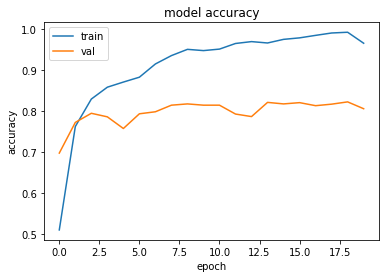

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

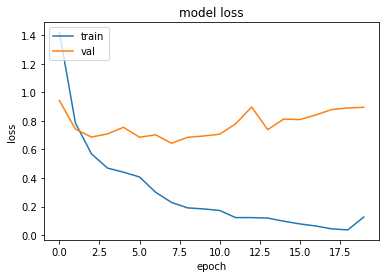

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [46]:
#model prediction
txt = df['text'].iloc[0]

In [49]:

X_val_seq = tokenizer.texts_to_sequences([txt])
X_val = pad_sequences(X_val_seq,maxlen=max_length, 
                               padding=padding_type, truncating=trunction_type)

In [56]:
np.argmax(model1.predict(X_val))

4

In [59]:
le.inverse_transform([4])

array(['siyaset '], dtype=object)

In [60]:
df['category'].iloc[0]

'siyaset '